## Get the number of lines per character

Firstly, we will load in the data from Google Spreadsheets by downloading the file (sheet) as csv file. The function in the next part is to load the csv file in as a dictionary.

In [1]:
### Taken from the course: Introduction to python 
def read_csv(input_file, delimiter=","):
    # your code here
    """
    Read a file with keyword parameter: delimiter, set to default ',' (split file on comma)
    and return the content of the file as a alpabetically sorted 'list of dicts'
    """
    
    # create a list to collect the rows:
    data = []
    
    with open(input_file, "r") as file:
        content = file.read()
        content = content.split('\n') # remove all newlines  
        
    # the first row is at index 0 and contains the headers
    headers = content[0]

    # consider everything following the header row as data
    for line in content[1::]:
        value_list = line.split(delimiter) # split the line into columns
        header_list = headers.split(delimiter) # split the header 
        
        # Create a dictionary and add to list
        dict_row = {}

        # zip for iterating over two lists at the same time
        dict_row = dict(zip(header_list, value_list))
        
        ###Taken from [https://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key] [2/10/2021]
        # looked up how to sort a dict on keys
        sorted_dict = dict(sorted(dict_row.items()))
        ###
       
        # add dictionary to list
        data.append(sorted_dict)

    return data

# test of function
# print the csv file as a dictionary
filename = "movie_convo_scifi.csv"
convo_scifi = read_csv(filename) 
convo_scifi[0:2]

[{'': 'm301',
  'characterID_1': 'u49',
  'characterID_2': 'u55',
  'list_utterance': "['L3712' 'L3713']",
  'movieID': 'm3'},
 {'': 'm571',
  'characterID_1': 'u49',
  'characterID_2': 'u55',
  'list_utterance': "['L3720' 'L3721']",
  'movieID': 'm3'}]

After you got the data as a dictionary we will do some cleaning and get the information we want, which in this case is the sum of the key: list_utterance per character.  

In [2]:
# create empty dic and list to append data from dictionary
dic = dict()
amount_sentences = [] 
for key in convo_scifi:
    character = key['characterID_1'] 
    list_utterance = key['list_utterance']
    movie_id = key['movieID']
    
    # remove the bracket & quotation marks from the list_utterance key and make it a list
    utterance = list_utterance.replace("' '", " ").replace("['", "").replace("']", "").split()
    
    # get the number of lines 
    num = len(utterance)
    
    # add the information to a dict
    if character not in dic:
        dic[character] = []
    dic[character].append({"list_utterance": utterance, "number": num, "movie_id": movie_id})

    
for character_id,info_list in dic.items():
    ###Taken from [https://stackoverflow.com/questions/21518271/how-to-sum-values-of-the-same-key-in-a-dictionary] [14/10/2021]
    ## get the sum of the number of lines per character 
    som = sum(d.get('number', 0) for d in info_list)
    ###

    amount_sentences.append((character_id, info_list[0]['movie_id'], som))

# test of function
amount_sentences[0:2]  

[('u49', 'm3', 14), ('u50', 'm3', 122)]

In [3]:
# To copy info into spreadsheet, print the information as str:
# for x in amount_sentences:
#     print(str(x[2]))

We load in another file to get the data on the characters, because we need the gender column for every character

In [4]:
# print the csv file as a dictionary
filename = "scifi_characters.csv"
character_scifi = read_csv(filename) 

# test of function
character_scifi[0:2]

[{'characterID': 'u78',
  'character_name': 'CORNELIUS',
  'gender': 'm',
  'movieID': 'm5',
  'movie_title': 'the fifth element'},
 {'characterID': 'u79',
  'character_name': 'DAVID',
  'gender': 'm',
  'movieID': 'm5',
  'movie_title': 'the fifth element'}]

Link the character data to the recently created: 'amount_sentences', which is the data on the sum of the number of lines and the chracterID and append the gender column to the data. As extra information we also added the data on movie title, movie id and character name.

In [5]:
# create empty list
info_dic = [] 
for x in amount_sentences:
    char = x[0]
    for info in character_scifi:
        # if characters are the same in the dict and strings,
        # append the information to a list of tuples
        if info['characterID'] == char:
            info_dic.append((char, x[1], info['movie_title'], info['character_name'], info['gender'], x[2]))
# test of function
info_dic[0:2]  

[('u78', 'm5', 'the fifth element', 'CORNELIUS', 'm', 118),
 ('u80', 'm5', 'the fifth element', 'DIVA', 'f', 15)]

In [6]:
# To copy info into spreadsheet, print the information as str:
# for x in info:
#     print(x[6])

## Create wordclouds from the lines of the kaggle (original) dataset

The code for the wordclouds is taken from this helpful website: **https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb**. For more explanation please look at the site :). 

Again, we firstly load in the data on the movie lines as a dictionary.

In [7]:
# print the csv file as a dictionary
filename = "movie_lines.csv"
lines_scifi = read_csv(filename) 

# test of function
lines_scifi[0:2]

[{'': '',
  'characterID': 'u0',
  'character_name': 'BIANCA',
  'lineID': 'L1045',
  'movieID': 'm0',
  'text_utterance': 'They do not!'},
 {'': '',
  'characterID': 'u2',
  'character_name': 'CAMERON',
  'lineID': 'L1044',
  'movieID': 'm0',
  'text_utterance': 'They do to!'}]

Now we append the information of the characters gender and the lines into a list of tuples.

In [8]:
# create empty list
line_info = [] 
for x in info_dic:
    character = x[0]
    for dic_info in lines_scifi:
        # if characters are the same in the dict and strings,
        # append the information to a list of tuples
        if dic_info['characterID'] == character: 
                line_info.append((x[4], dic_info['text_utterance']))
                
# test of function
line_info[0:2]

[('m', "I can't pretend to be your husband... David's in great shape."),
 ('m',
  "No I'm not proud of myself... But we don't have the luxury of choice.")]

In the function: *'join_by_first_item(list_of_tuples)'* we append all the lines to their respective gender. By doing this we get an tuple with as first item the gender and all the other items are the lines.

In [9]:
### Taken from [https://stackoverflow.com/questions/55436362/find-tuple-in-list-with-same-first-item-and-return-another-list] [17/10/2021]
# join the lines in tuple on first item in tuple (in this case the gender)
def join_by_first_item(list_of_tuples):
    out = {}
    for tup in list_of_tuples:
        try:
            out[tup[0]].extend(tup[1:])
        except KeyError:
            out[tup[0]] = list(tup)
    return [tuple(values) for values in out.values()]
###

var = join_by_first_item(line_info)

# test of function
var[3]

('x',
 'GOOD MORNING!',
 'GOOD MORNING!',
 'Good MORNING!',
 'Good morning...',
 'That sounds charming.  What are you planning to do tomorrow?',
 "Tell me about the interesting people you met won't you?",
 'That sounds charming.  Did you meet any interesting people today?',
 'Good evening.  Did you have a pleasant day today?')

These tuples we append to a list.

In [10]:
# create empty list
lines_information = []
for line in var:
    gender = line[0]
    lines = list(line[1:])
    lines_information.append((gender, lines))
    
# test of function uncomment next line
# lines_information

Now we are going to import the necessary libaries to create the wordclouds

In [11]:
#import necessary libraries

#for importing data and wrangling
import pandas as pd
import numpy as np
import re

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

The data: list of tuples we just created, is going to be put in a pandas DataFrame, which looks like a Spreadsheet.

In [12]:
# read data into DataFrame
df = pd.DataFrame(lines_information, columns =['gender', 'lines'])
  
df

,gender,lines
0,m,[I can't pretend to be your husband... David's...
1,f,"[They are... with me..., I would like to have ..."
2,n,"[Thanks., Armed., Check at six minutes., Deton..."
3,x,"[GOOD MORNING!, GOOD MORNING!, Good MORNING!, ..."


We append the lines per gender to a list, which will be the corpus per gender. 

In [13]:
# #create a list of responses for each gender
female_corpus = df[df['gender']=='f'].lines.tolist()
male_corpus = df[df['gender']=='m'].lines.tolist()
neutral_corpus = df[df['gender']=='n'].lines.tolist()
unknown_corpus = df[df['gender']=='x'].lines.tolist()

# test of function uncomment next line to test female corpus
# female_corpus

First with the created corpus per gender we are going to preprocess (clean) it. We will first lowercase the whole corpus. After that we will remove contractions from words and remove punctionation from the corpus.  

In [14]:
def text_corpus(list_corpus):
    """Get the contents(lines) of the corpus 
    and return a string of the corpus text in lower case."""
    for lines in list_corpus:
        # join the list and lowercase all the words
        text = ' '.join(lines).lower()    
    return text

In [15]:
text_female = text_corpus(female_corpus)
text_male = text_corpus(male_corpus)
text_neutral = text_corpus(neutral_corpus)
text_unknown = text_corpus(unknown_corpus)

# test of function uncomment next line to test male corpus
# text_male

In [16]:
###Taken from [https://stackoverflow.com/questions/43018030/replace-apostrophe-short-words-in-python] [17/1/2021]
# to make the words in sentences the same and be able to remove stopwords
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
###

### Taken from the course: Introduction to python 
def clean_text_general(text, chars_to_remove = {'\n', ',', '.', '"', "!", "-"}): 
    """
    Replace all characters that uses provides by empty spaces in a text.
    """
    for char in chars_to_remove:
        text = text.replace(char, '')
        text = decontracted(text)
    return text
###

In [17]:
clean_f = clean_text_general(text_female)
clean_m = clean_text_general(text_male)
clean_n = clean_text_general(text_neutral)
clean_x = clean_text_general(text_unknown)

In the next function we look at the (raw) frequency of words in the corpus and look at the top 50 words used per gender.

In [18]:
### Taken from the course: Introduction to python 
# create a dictionary of word frequencies
def count(text):
    """
    Determine how often each word occurs in a string.
    """
    # call the function preprocess

    words = text.split()
    
    words_count_dict = dict()
    for word in words:
        if word not in STOPWORDS:
            if word in words_count_dict: # add 1 to the dictionary if the keys exists
                words_count_dict[word] += 1 
            else:
                words_count_dict[word] = 1 # set default value to 1 if key does not exists 
    ###Taken from [https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb] [17/10/2021]
    # sort the dictionary
    word_freq={k: v for k, v in sorted(words_count_dict.items(),reverse=True, key=lambda item: item[1])}
    ###
    
    return word_freq
###
word_freq_f = count(clean_f)
word_freq_m = count(clean_m)
word_freq_n = count(clean_n)
word_freq_x = count(clean_x)

#print results
print(f"Female: {list(word_freq_f.items())[:50]}")
print()
print(f"Male: {list(word_freq_m.items())[:50]}")
print()
print(f"Neutral: {list(word_freq_n.items())[:50]}")
print()
print(f"Unknown: {list(word_freq_x.items())[:50]}")

Female: [('know', 167), ('will', 144), ('think', 86), ('want', 81), ('one', 77), ('go', 68), ('now', 68), ('right', 64), ('going', 56), ('got', 53), ('something', 52), ('oh', 52), ('good', 49), ('come', 48), ('way', 47), ('tell', 46), ('back', 45), ('well', 44), ('see', 44), ('us', 43), ('time', 40), ('look', 40), ('never', 39), ('make', 39), ('sorry', 39), ('really', 39), ('maybe', 38), ('yeah', 37), ('little', 37), ('yes', 36), ('mean', 33), ('need', 32), ('remember', 32), ('me?', 31), ('ted', 30), ('things', 30), ('okay', 29), ('what?', 29), ('you?', 28), ('say', 28), ('sure', 27), ('love', 26), ('said', 26), ('take', 26), ('let', 26), ('thought', 26), ('gonna', 26), ('people', 25), ('that?', 25), ('guy', 24)]

Male: [('will', 398), ('know', 353), ('one', 189), ('think', 188), ('go', 179), ('now', 167), ('got', 167), ('right', 164), ('want', 156), ('going', 150), ('us', 148), ('well', 146), ('time', 139), ('let', 126), ('see', 118), ('oh', 111), ('yeah', 111), ('tell', 110), ('back'

Finally we are going to make the wordclouds. For this we wrote two functions. At the first one we do not give a minimum word length or a collocation threshold, but at the second function we do give a minimum word length and a collocation threshold.

In [19]:
def wordcloud(text):
    ###Taken from [https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb] [17/10/2021]
    #create the wordcloud object
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          collocations=True, background_color = 'white').generate(text)
    # plot the wordcloud object
    plt.imshow(wordcloud, interpolation='bilInear')
    plt.axis('off')
    ###
    ###Taken from [https://stackoverflow.com/questions/30408141/how-to-maximize-plt-show-using-python-on-mac] [17/10/2021]
    # get the plot in a new frame & save it
#     plt.switch_backend('Qt4Agg')

#     figM = plt.get_current_fig_manager()
#     figM.window.showMaximized()
    ###
    return plt.show()

In [20]:
def cloud(text):
    ###Taken from [https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb] [17/10/2021]
    # create the wordcloud object
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          collocations=True, background_color = 'white', min_word_length= 4, collocation_threshold=3 ).generate(text)

    #plot the wordcloud object
    plt.imshow(wordcloud, interpolation='bilInear')
    plt.axis('off')
    ###
    
    ###Taken from [https://stackoverflow.com/questions/30408141/how-to-maximize-plt-show-using-python-on-mac] [17/10/2021]
    # get the plot in a new frame & save it
#     plt.switch_backend('Qt4Agg')

#     figM = plt.get_current_fig_manager()
#     figM.window.showMaximized()
    ###
    return plt.show()

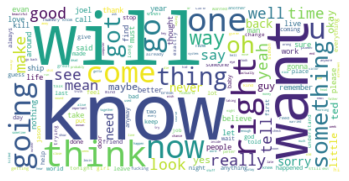

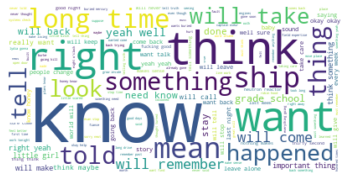

In [21]:
cloud_female = wordcloud(clean_f)
cloud_f = cloud(clean_f)

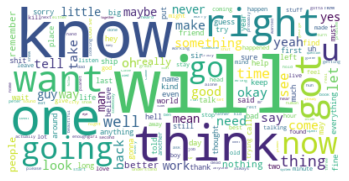

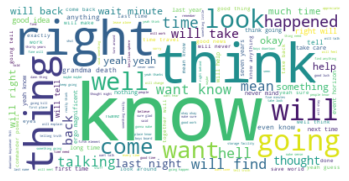

In [22]:
cloud_male = wordcloud(clean_m)
cloud_m = cloud(clean_m)

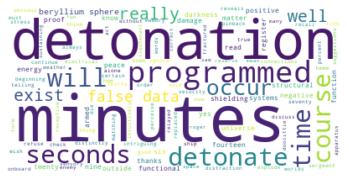

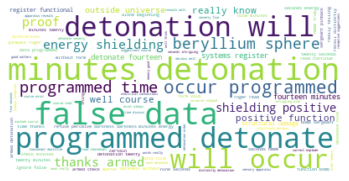

In [23]:
cloud_neutral = wordcloud(clean_n)
cloud_n = cloud(clean_n)

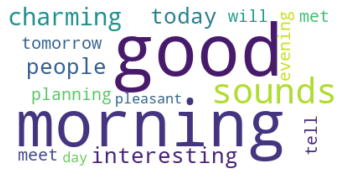

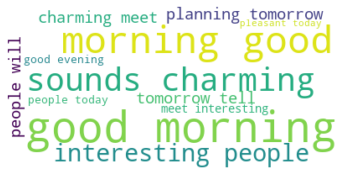

In [24]:
cloud_unknown = wordcloud(clean_x)
cloud_u = cloud(clean_x)